## Code required to create Figure 2
*From "Exploring uncertainty of trends in the lower-tropospheric North Pacific Jet."* 

Entire notebook takes: 41 seconds on Intel i7-10750 using > 4GB RAM


In [1]:
import datetime
import numpy as np
import pandas as pd
import xarray as xr
from statsmodels.tsa.stattools import adfuller ## Augmented Dickey-Fuller test for non-stationarity in time series
from statsmodels.tsa.seasonal import seasonal_decompose
import pymannkendall

## Plotting
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
START_YEAR = "1980"
END_YEAR = "2022"
SEASONS = ['DJF', 'MAM', 'JJA', 'SON']

In [3]:
METRIC_NAMES = ["Woollings et al. 2010", "Barnes & Polvani 2013", "Grise & Polvani 2014",
                "Barnes & Simpson 2017", "Bracegirdle et al. 2018", "Zappa et al. 2018", "Kerr et al. 2020"]
METRIC_DATA_NAMES = ['Woollings2010_NorthPacific', 'BarnesPolvani2013_NorthPacific', 'GrisePolvani2014_NorthPacific',
                     'BarnesSimpson2017_NorthPacific', 'Bracegirdle2018_NorthPacific', 'Zappa2018_NorthPacific',\
                     'Kerr2020_NorthPacific']

In [4]:
METRIC_LABEL_RENAMER = dict(zip(METRIC_DATA_NAMES, METRIC_NAMES))

## Load Reanalysis

In [5]:
era_npac_day_dict = {}

era_npac_day_dict['Woollings2010_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_ERA5_daily_outputs/Woollings et al. 2010 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
era_npac_day_dict['BarnesPolvani2013_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_ERA5_daily_outputs/Barnes & Polvani 2013 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
era_npac_day_dict['GrisePolvani2014_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_ERA5_daily_outputs/Grise & Polvani 2014 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
era_npac_day_dict['BarnesPolvani2015_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_ERA5_daily_outputs/Barnes & Polvani 2015 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
era_npac_day_dict['BarnesSimpson2017_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_ERA5_daily_outputs/Barnes & Simpson 2017 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
era_npac_day_dict['Bracegirdle2018_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_ERA5_daily_outputs/Bracegirdle et al. 2018 North Pacific.csv', index_col='year')
era_npac_day_dict['Zappa2018_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_ERA5_daily_outputs/Zappa et al. 2018 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
era_npac_day_dict['Kerr2020_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_ERA5_daily_outputs/Kerr et al. 2020 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]


In [6]:
jra55_npac_day_dict = {}

jra55_npac_day_dict['Woollings2010_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_JRA55_daily_outputs/Woollings et al. 2010 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
jra55_npac_day_dict['BarnesPolvani2013_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_JRA55_daily_outputs/Barnes & Polvani 2013 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
jra55_npac_day_dict['GrisePolvani2014_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_JRA55_daily_outputs/Grise & Polvani 2017 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
jra55_npac_day_dict['BarnesPolvani2015_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_JRA55_daily_outputs/Barnes & Polvani 2015 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
jra55_npac_day_dict['BarnesSimpson2017_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_JRA55_daily_outputs/Barnes & Simpson 2017 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
jra55_npac_day_dict['Bracegirdle2018_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_JRA55_daily_outputs/Bracegirdle et al. 2018 North Pacific.csv', index_col='year')
jra55_npac_day_dict['Zappa2018_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_JRA55_daily_outputs/Zappa et al. 2018 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
jra55_npac_day_dict['Kerr2020_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_JRA55_daily_outputs/Kerr et al. 2020 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]


In [7]:
merra2_npac_day_dict = {}

merra2_npac_day_dict['Woollings2010_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_MERRA2_daily_outputs/Woollings et al. 2010 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
merra2_npac_day_dict['BarnesPolvani2013_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_MERRA2_daily_outputs/Barnes & Polvani 2013 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
merra2_npac_day_dict['GrisePolvani2014_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_MERRA2_daily_outputs/Grise & Polvani 2017 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
merra2_npac_day_dict['BarnesPolvani2015_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_MERRA2_daily_outputs/Barnes & Polvani 2015 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
merra2_npac_day_dict['BarnesSimpson2017_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_MERRA2_daily_outputs/Barnes & Simpson 2017 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
merra2_npac_day_dict['Bracegirdle2018_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_MERRA2_daily_outputs/Bracegirdle et al. 2018 North Pacific.csv', index_col='year')
merra2_npac_day_dict['Zappa2018_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_MERRA2_daily_outputs/Zappa et al. 2018 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
merra2_npac_day_dict['Kerr2020_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_MERRA2_daily_outputs/Kerr et al. 2020 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]


In [8]:
ncepdoe2_npac_day_dict = {}

ncepdoe2_npac_day_dict['Woollings2010_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_NCEPDOE2_daily_outputs/Woollings et al. 2010 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
ncepdoe2_npac_day_dict['BarnesPolvani2013_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_NCEPDOE2_daily_outputs/Barnes & Polvani 2013 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
ncepdoe2_npac_day_dict['GrisePolvani2014_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_NCEPDOE2_daily_outputs/Grise & Polvani 2017 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
ncepdoe2_npac_day_dict['BarnesPolvani2015_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_NCEPDOE2_daily_outputs/Barnes & Polvani 2015 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
ncepdoe2_npac_day_dict['BarnesSimpson2017_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_NCEPDOE2_daily_outputs/Barnes & Simpson 2017 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
ncepdoe2_npac_day_dict['Bracegirdle2018_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_NCEPDOE2_daily_outputs/Bracegirdle et al. 2018 North Pacific.csv', index_col='year')
ncepdoe2_npac_day_dict['Zappa2018_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_NCEPDOE2_daily_outputs/Zappa et al. 2018 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
ncepdoe2_npac_day_dict['Kerr2020_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_NCEPDOE2_daily_outputs/Kerr et al. 2020 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]


# Make Figure 2

In [9]:
### required functions for calculating gradient/trend
def get_linear_reg_slope(data, col_name):
    lin_reg_data = prepare_data_for_linear_reg(data, col_name)
    return linear_reg_slope(lin_reg_data)


def prepare_data_for_linear_reg(data, col_name):
    values = data[col_name].values.astype(float)
    ordinal_dates = get_ordinal_dates(data)
    lin_reg_data = pd.DataFrame([values, ordinal_dates]).T
    lin_reg_data = lin_reg_data.dropna()
    return lin_reg_data


def get_ordinal_dates(data, index_col_name='time'):
    return pd.to_datetime(data.reset_index()[index_col_name]).apply(lambda date: date.toordinal())


def linear_reg_slope(data):
    """
        data[0] should be values, data[1] should be ordinal dates
    """
    slope, intercept = np.polyfit(data[1], data[0], 1)
    lr1d = np.poly1d([slope, intercept])(data[1])
    return pd.DataFrame(lr1d, index=data[1].apply(lambda row: pd.to_datetime(datetime.date.fromordinal(int(row)))), columns=['reg_line'])

def get_year_gradient_of_trend(data, jet_lat_name='jet_lat', proportion_threshold_for_missing_data=4):
    """
        TODO: fix ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None
    """
    try:
        cdata = data.dropna()
        lin_reg_line = get_linear_reg_slope(data, jet_lat_name)
        year_gradient = (lin_reg_line['reg_line'][-1] - lin_reg_line['reg_line'][0]) / (lin_reg_line.index.year[-1]  - lin_reg_line.index.year[0])
        return year_gradient
    except ValueError as ve:
        print(ve)
        pass
    try:
        assert float(data.isnull().sum(axis=0)) < (len(data)/proportion_threshold_for_missing_data)
        data = data.fillna(data.mean())
        lin_reg_line = get_linear_reg_slope(data, jet_lat_name)
        year_gradient = (lin_reg_line['reg_line'][-1] - lin_reg_line['reg_line'][0]) / (lin_reg_line.index.year[-1]  - lin_reg_line.index.year[0])
        return year_gradient
    except AssertionError as ae:
        print(f"{data.name}failed. {int(data.isnull().sum(axis=0))} out of {len(data)} data points missing")
        return np.nan

## Get trend and mean by season

In [10]:
SIG_PVALUE = 0.05

In [11]:
%%time
## Takes ~30 seconds on Intel i7-10750
reanalysis_data = [era_npac_day_dict, jra55_npac_day_dict, merra2_npac_day_dict, ncepdoe2_npac_day_dict]
reanalysis_names = ["ERA-5", "JRA-55", "MERRA-2", "NCEP/DOE II"]
djf_jet_lat_mean_dict = {}
mam_jet_lat_mean_dict = {}
jja_jet_lat_mean_dict = {}
son_jet_lat_mean_dict = {}
djf_jet_lat_trend_dict = {}
mam_jet_lat_trend_dict = {}
jja_jet_lat_trend_dict = {}
son_jet_lat_trend_dict = {}
djf_jet_lat_trend_sig_dict = {}
mam_jet_lat_trend_sig_dict = {}
jja_jet_lat_trend_sig_dict = {}
son_jet_lat_trend_sig_dict = {}
for ind, reanalysis_set in enumerate(reanalysis_data):
    reanalysis_name = reanalysis_names[ind]
    djf_jet_lat_mean_dict[reanalysis_name] = {}
    mam_jet_lat_mean_dict[reanalysis_name] = {}
    jja_jet_lat_mean_dict[reanalysis_name] = {}
    son_jet_lat_mean_dict[reanalysis_name] = {}
    djf_jet_lat_trend_dict[reanalysis_name] = {}
    mam_jet_lat_trend_dict[reanalysis_name] = {}
    jja_jet_lat_trend_dict[reanalysis_name] = {}
    son_jet_lat_trend_dict[reanalysis_name] = {}
    djf_jet_lat_trend_sig_dict[reanalysis_name] = {}
    mam_jet_lat_trend_sig_dict[reanalysis_name] = {}
    jja_jet_lat_trend_sig_dict[reanalysis_name] = {}
    son_jet_lat_trend_sig_dict[reanalysis_name] = {}
    print(reanalysis_name)
    for metric in METRIC_DATA_NAMES:
        reanalysis_set[metric].index = pd.to_datetime(reanalysis_set[metric].index)
    
        if metric == "Bracegirdle2018_NorthPacific":
            ## ignore because only calculated by annual scale
            continue
        else:
            djf_jet_lat_mean_dict[reanalysis_name][metric] = float(reanalysis_set[metric][reanalysis_set[metric].index.month.isin([12, 1, 2])]['jet_lat'].mean())
            mam_jet_lat_mean_dict[reanalysis_name][metric] = float(reanalysis_set[metric][reanalysis_set[metric].index.month.isin([3, 4, 5])]['jet_lat'].mean())
            jja_jet_lat_mean_dict[reanalysis_name][metric] = float(reanalysis_set[metric][reanalysis_set[metric].index.month.isin([6, 7, 8])]['jet_lat'].mean())
            son_jet_lat_mean_dict[reanalysis_name][metric] = float(reanalysis_set[metric][reanalysis_set[metric].index.month.isin([9, 10, 11])]['jet_lat'].mean())
   
            # djf_jet_lat_trend_dict[reanalysis_name][metric] = get_year_gradient_of_trend(reanalysis_set[metric][reanalysis_set[metric].index.month.isin([12, 1, 2])])
            # mam_jet_lat_trend_dict[reanalysis_name][metric] = get_year_gradient_of_trend(reanalysis_set[metric][reanalysis_set[metric].index.month.isin([3, 4, 5])])
            # jja_jet_lat_trend_dict[reanalysis_name][metric] = get_year_gradient_of_trend(reanalysis_set[metric][reanalysis_set[metric].index.month.isin([6, 7, 8])])
            # son_jet_lat_trend_dict[reanalysis_name][metric] = get_year_gradient_of_trend(reanalysis_set[metric][reanalysis_set[metric].index.month.isin([9, 10, 11])])
            
            reanalysis_set_monthly = reanalysis_set[metric].resample('1m').mean()
            
            djf_jet_lat_trend_dict[reanalysis_name][metric] = pymannkendall.original_test(reanalysis_set_monthly[reanalysis_set_monthly.index.month.isin([12, 1, 2])]).slope * 3
            mam_jet_lat_trend_dict[reanalysis_name][metric] = pymannkendall.original_test(reanalysis_set_monthly[reanalysis_set_monthly.index.month.isin([3, 4, 5])]).slope * 3
            jja_jet_lat_trend_dict[reanalysis_name][metric] = pymannkendall.original_test(reanalysis_set_monthly[reanalysis_set_monthly.index.month.isin([6, 7, 8])]).slope * 3
            son_jet_lat_trend_dict[reanalysis_name][metric] = pymannkendall.original_test(reanalysis_set_monthly[reanalysis_set_monthly.index.month.isin([9, 10, 11])]).slope * 3
            
            print(pymannkendall.original_test(reanalysis_set_monthly[reanalysis_set_monthly.index.month.isin([12, 1, 2])]).slope * 3, get_year_gradient_of_trend(reanalysis_set[metric][reanalysis_set[metric].index.month.isin([12, 1, 2])]))
            djf_jet_lat_trend_sig_dict[reanalysis_name][metric] = pymannkendall.original_test(reanalysis_set[metric][reanalysis_set[metric].index.month.isin([12, 1, 2])]).p < SIG_PVALUE
            mam_jet_lat_trend_sig_dict[reanalysis_name][metric] = pymannkendall.original_test(reanalysis_set[metric][reanalysis_set[metric].index.month.isin([3, 4, 5])]).p < SIG_PVALUE
            jja_jet_lat_trend_sig_dict[reanalysis_name][metric] = pymannkendall.original_test(reanalysis_set[metric][reanalysis_set[metric].index.month.isin([6, 7, 8])]).p < SIG_PVALUE
            son_jet_lat_trend_sig_dict[reanalysis_name][metric] = pymannkendall.original_test(reanalysis_set[metric][reanalysis_set[metric].index.month.isin([9, 10, 11])]).p < SIG_PVALUE


ERA-5
0.07057881773399004 0.06867116718299186
0.07523196561502993 0.07074968456588522
0.07109853618866883 0.06846168602328362
0.07653061224489796 0.07183957319490446
0.06010967696371984 0.05715389054422566
0.0395557500820658 0.04070384558060525
JRA-55
0.07640067911714779 0.07692662026650648
0.08200778642936614 0.07860025791391552
0.09230837438423663 0.08917470185597877
0.08928571428571427 0.07555937407657991
0.0732368761846932 0.07018572953807772
0.04965645636372272 0.049584644878014804
MERRA-2
0.06717122332803993 0.06846777919022053
0.07884556659818998 0.07273014161533843
0.07942928039702224 0.0762194196169069
0.0796703296703296 0.06914643832183257
0.06120809361956441 0.05968834503446508
0.03754700818987136 0.03546503976066409
NCEP/DOE II
0.06937919686089106 0.07282438967322877
0.07877356514453253 0.07569195234931704
0.08645161290322534 0.08133826164954086
0.08333333333333322 0.06965338777617196
0.0695540640780313 0.06620802056581554
0.05087810045191974 0.04967514054290095
CPU times: 

In [12]:
def format_dict_to_dataframe(jet_lat_dict, unique_col_name):
    jet_lat_df = pd.DataFrame(jet_lat_dict)
    jet_lat_df = jet_lat_df.stack().reset_index()
    jet_lat_df.columns = ["Metric", "Dataset", unique_col_name]
    ## rename metric name to formatted version
    jet_lat_df['Metric'] = jet_lat_df.Metric.apply(lambda row: METRIC_LABEL_RENAMER[row])
    ## include decade trend 
    if 'trend' in unique_col_name.lower():
        jet_lat_df[unique_col_name+'_decade'] = jet_lat_df[unique_col_name]*10
    return jet_lat_df

In [13]:
djf_jet_lat_mean_df = format_dict_to_dataframe(djf_jet_lat_mean_dict, "DJF Mean")
djf_jet_lat_trend_df = format_dict_to_dataframe(djf_jet_lat_trend_dict, "DJF Trend")
djf_jet_lat_trend_sig_df = format_dict_to_dataframe(djf_jet_lat_trend_sig_dict, "DJF Trend <0.05")

mam_jet_lat_mean_df = format_dict_to_dataframe(mam_jet_lat_mean_dict, "MAM Mean")
mam_jet_lat_trend_df = format_dict_to_dataframe(mam_jet_lat_trend_dict, "MAM Trend")
mam_jet_lat_trend_sig_df = format_dict_to_dataframe(mam_jet_lat_trend_sig_dict, "MAM Trend <0.05")

jja_jet_lat_mean_df = format_dict_to_dataframe(jja_jet_lat_mean_dict, "JJA Mean")
jja_jet_lat_trend_df = format_dict_to_dataframe(jja_jet_lat_trend_dict, "JJA Trend")
jja_jet_lat_trend_sig_df = format_dict_to_dataframe(jja_jet_lat_trend_sig_dict, "JJA Trend <0.05")

son_jet_lat_mean_df = format_dict_to_dataframe(son_jet_lat_mean_dict, "SON Mean")
son_jet_lat_trend_df = format_dict_to_dataframe(son_jet_lat_trend_dict, "SON Trend")
son_jet_lat_trend_sig_df = format_dict_to_dataframe(son_jet_lat_trend_sig_dict, "SON Trend <0.05")


In [14]:
## merge all
allseasons_jet_lat_mean_df = djf_jet_lat_mean_df.merge(mam_jet_lat_mean_df)
allseasons_jet_lat_mean_df = allseasons_jet_lat_mean_df.merge(jja_jet_lat_mean_df)
allseasons_jet_lat_mean_df = allseasons_jet_lat_mean_df.merge(son_jet_lat_mean_df)

allseasons_jet_lat_trend_df = djf_jet_lat_trend_df.merge(mam_jet_lat_trend_df)
allseasons_jet_lat_trend_df = allseasons_jet_lat_trend_df.merge(jja_jet_lat_trend_df)
allseasons_jet_lat_trend_df = allseasons_jet_lat_trend_df.merge(son_jet_lat_trend_df)

allseasons_jet_lat_trend_sig_df = djf_jet_lat_trend_sig_df.merge(mam_jet_lat_trend_sig_df)
allseasons_jet_lat_trend_sig_df = allseasons_jet_lat_trend_sig_df.merge(jja_jet_lat_trend_sig_df)
allseasons_jet_lat_trend_sig_df = allseasons_jet_lat_trend_sig_df.merge(son_jet_lat_trend_sig_df)

allseasons_jet_lat_mean_and_trend_df = allseasons_jet_lat_mean_df.merge(allseasons_jet_lat_trend_df)
allseasons_jet_lat_mean_and_trend_sig_df = allseasons_jet_lat_mean_and_trend_df.merge(allseasons_jet_lat_trend_sig_df)

### Workout range of uncertainty across dataset and metric 

In [15]:
dataset_maximums = allseasons_jet_lat_trend_df.groupby('Dataset').max()
dataset_minimums = allseasons_jet_lat_trend_df.groupby('Dataset').min()

metric_maximums = allseasons_jet_lat_trend_df.groupby('Metric').max()
metric_minimums = allseasons_jet_lat_trend_df.groupby('Metric').min()

In [16]:
## get min and max ranges
seasonal_dataset_range = {}
seasonal_metric_range = {}
for col in dataset_maximums.columns[1:]:
    if 'Trend_decade' in col:
        current_season = col[:3]
        seasonal_dataset_range[current_season] = []
        seasonal_metric_range[current_season] = []
        seasonal_dataset_range[current_season].append((dataset_maximums[col] - dataset_minimums[col]).min())
        seasonal_dataset_range[current_season].append((dataset_maximums[col] - dataset_minimums[col]).max())
        seasonal_metric_range[current_season].append((metric_maximums[col] - metric_minimums[col]).min())
        seasonal_metric_range[current_season].append((metric_maximums[col] - metric_minimums[col]).max())


In [17]:
seasonal_metric_range # shows reanalysis uncertainty (i.e. difference between max and min metrics per data) 

{'DJF': [0.06775820814336209, 0.21209838195567787],
 'MAM': [0.12969970733080594, 0.21997376001825314],
 'JJA': [0.2684469105102411, 0.4907077705386854],
 'SON': [0.11166503768364935, 0.27771165362504]}

In [18]:
seasonal_dataset_range # shows metric uncertainty (i.e. difference between max and min) 

{'DJF': [0.355735124513056, 0.426519180205139],
 'MAM': [0.16046741277156001, 0.23844236253750545],
 'JJA': [0.3345240469447708, 0.5309382899493202],
 'SON': [0.12116345656348201, 0.3064628347534994]}

In [19]:
def make_trend_kde_and_scatter_plot(allseason_data, column_to_use, ax, use_legend=False):
    sns.kdeplot(allseason_data[column_to_use], ax=ax, linewidth=6, alpha=.5)
    num_of_metrics = len(allseason_data.loc[allseason_data['Dataset'] == 'ERA-5'])
    sns.scatterplot(x=column_to_use, y=[1.1]*num_of_metrics, style='Metric', s=100, data=allseason_data.loc[allseason_data['Dataset'] == 'ERA-5'], ax=ax, legend=False)
    sns.scatterplot(x=column_to_use, y=[0.8]*num_of_metrics, style='Metric', s=100, data=allseason_data.loc[allseason_data['Dataset'] == 'JRA-55'], ax=ax, legend=False)
    sns.scatterplot(x=column_to_use, y=[0.5]*num_of_metrics, style='Metric', s=100, data=allseason_data.loc[allseason_data['Dataset'] == 'MERRA-2'], ax=ax, legend=False)
    sns.scatterplot(x=column_to_use, y=[0.2]*num_of_metrics, style='Metric', s=100, data=allseason_data.loc[allseason_data['Dataset'] == 'NCEP/DOE II'], ax=ax, legend=use_legend)
    ax.set_xlabel(r"Trend ${(\circ N^{-decade})}$", size=16)
    ax.set_ylabel("Density", size=16)
    
def make_trend_kde(allseason_data, column_to_use, ax, ymax, labels=True):
    sns.kdeplot(allseason_data[column_to_use], ax=ax, linewidth=6, alpha=.5)
    ax.set_xlabel(r"Trend ${(\circ N^{-decade})}$", size=16)
    ax.set_ylabel("Density", size=16)
    ax.set_ylim(0, ymax)
    ax.set_yticks(np.arange(0.5, ymax))
    ax.grid(True)
    ax.vlines(0, 0, ymax, color='k', linewidth=2, linestyle='--', alpha=.4)
    if not labels:
        ax.set_ylabel("")
        ax.get_yaxis().set_ticklabels([])
    
def make_reanalysis_scatter(allseason_data, column_to_use, ax, use_legend=False, labels=True, alpha=1.):
    num_of_metrics = len(allseason_data.loc[allseason_data['Dataset'] == 'ERA-5'])
    
    sns.scatterplot(x=column_to_use, y=[4]*num_of_metrics, style='Metric', s=70, data=allseason_data.loc[allseason_data['Dataset'] == 'ERA-5'], alpha=alpha, ax=ax, color='C0', legend=False)
    sns.scatterplot(x=column_to_use, y=[3]*num_of_metrics, style='Metric', s=70, data=allseason_data.loc[allseason_data['Dataset'] == 'JRA-55'], alpha=alpha, ax=ax, color='C1', legend=False)
    sns.scatterplot(x=column_to_use, y=[2]*num_of_metrics, style='Metric', s=70, data=allseason_data.loc[allseason_data['Dataset'] == 'MERRA-2'], alpha=alpha, ax=ax, color='C2', legend=False)
    sns.scatterplot(x=column_to_use, y=[1]*num_of_metrics, style='Metric', s=70, data=allseason_data.loc[allseason_data['Dataset'] == 'NCEP/DOE II'], alpha=alpha, ax=ax, color='C3', legend=use_legend)
    ax.vlines(0, 0, 5, color='k', linewidth=2, linestyle='--', alpha=.4)
    ax.set_ylim(0.5, 4.5)
    ax.set_yticks(np.arange(0, 6))
    ax.set_yticklabels(["", "NCEP/DOE II", "MERRA-2", "JRA-55", "ERA5", ""])
    ax.grid(axis='x')
    if not labels:
        ax.get_yaxis().set_ticklabels([])

In [20]:
allseasons_jet_lat_mean_and_trend_sig_df['DJF Trend_decade_sig'] = allseasons_jet_lat_mean_and_trend_sig_df.apply(lambda row: row['DJF Trend_decade'] if row['DJF Trend <0.05'] else np.nan, axis=1)
allseasons_jet_lat_mean_and_trend_sig_df['MAM Trend_decade_sig'] = allseasons_jet_lat_mean_and_trend_sig_df.apply(lambda row: row['MAM Trend_decade'] if row['MAM Trend <0.05'] else np.nan, axis=1)
allseasons_jet_lat_mean_and_trend_sig_df['JJA Trend_decade_sig'] = allseasons_jet_lat_mean_and_trend_sig_df.apply(lambda row: row['JJA Trend_decade'] if row['JJA Trend <0.05'] else np.nan, axis=1)
allseasons_jet_lat_mean_and_trend_sig_df['SON Trend_decade_sig'] = allseasons_jet_lat_mean_and_trend_sig_df.apply(lambda row: row['SON Trend_decade'] if row['SON Trend <0.05'] else np.nan, axis=1)

allseasons_jet_lat_mean_and_trend_sig_df['DJF Trend_decade_nonsig'] = allseasons_jet_lat_mean_and_trend_sig_df.apply(lambda row: row['DJF Trend_decade'] if not row['DJF Trend <0.05'] else np.nan, axis=1)
allseasons_jet_lat_mean_and_trend_sig_df['MAM Trend_decade_nonsig'] = allseasons_jet_lat_mean_and_trend_sig_df.apply(lambda row: row['MAM Trend_decade'] if not row['MAM Trend <0.05'] else np.nan, axis=1)
allseasons_jet_lat_mean_and_trend_sig_df['JJA Trend_decade_nonsig'] = allseasons_jet_lat_mean_and_trend_sig_df.apply(lambda row: row['JJA Trend_decade'] if not row['JJA Trend <0.05'] else np.nan, axis=1)
allseasons_jet_lat_mean_and_trend_sig_df['SON Trend_decade_nonsig'] = allseasons_jet_lat_mean_and_trend_sig_df.apply(lambda row: row['SON Trend_decade'] if not row['SON Trend <0.05'] else np.nan, axis=1)


/tmp/ipykernel_122187/3294190208.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12);
/tmp/ipykernel_122187/3294190208.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12);


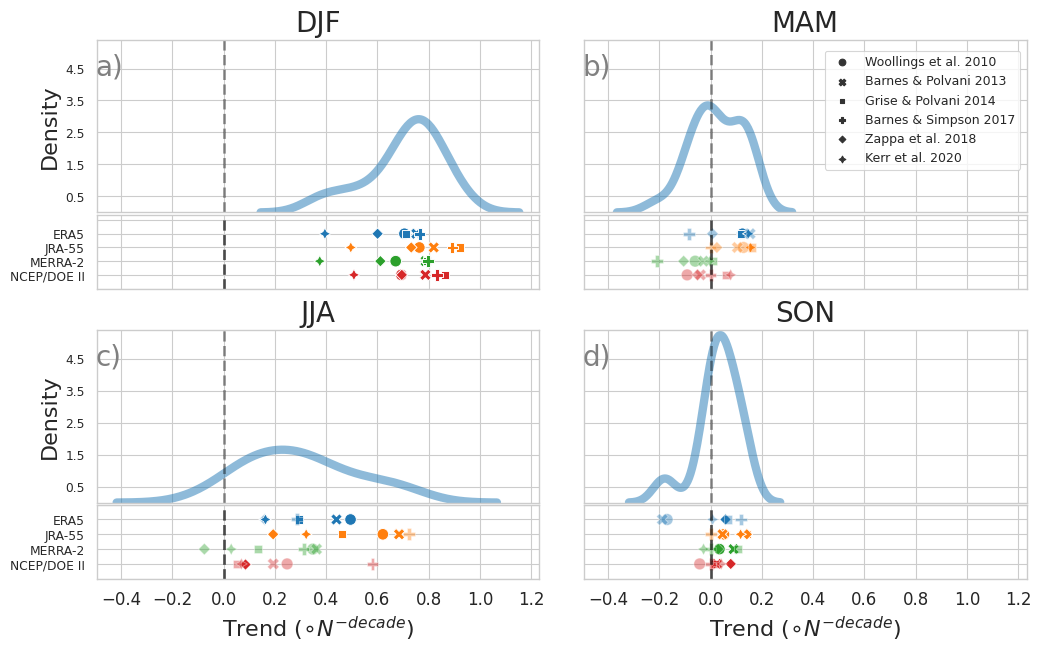

In [35]:
sns.set_style('whitegrid')
sns.set_context('paper')
fig, axes = plt.subplots(5, 2, figsize=(12, 7), sharex=True, height_ratios=[0.7, 0.3, 0.15, 0.7, 0.3])
ymax = 5.4
make_trend_kde(allseasons_jet_lat_trend_df, 'DJF Trend_decade', ymax=ymax, ax=axes[0][0])
make_trend_kde(allseasons_jet_lat_trend_df, 'MAM Trend_decade', ymax=ymax, ax=axes[0][1], labels=False)
make_trend_kde(allseasons_jet_lat_trend_df, 'JJA Trend_decade', ymax=ymax, ax=axes[3][0])
make_trend_kde(allseasons_jet_lat_trend_df, 'SON Trend_decade', ymax=ymax, ax=axes[3][1], labels=False)
make_reanalysis_scatter(allseasons_jet_lat_mean_and_trend_sig_df, 'DJF Trend_decade_sig', alpha=1, ax=axes[1][0])
make_reanalysis_scatter(allseasons_jet_lat_mean_and_trend_sig_df, 'DJF Trend_decade_nonsig', alpha=.4, ax=axes[1][0])
make_reanalysis_scatter(allseasons_jet_lat_mean_and_trend_sig_df, 'MAM Trend_decade_sig', alpha=1, ax=axes[1][1], labels=False)
make_reanalysis_scatter(allseasons_jet_lat_mean_and_trend_sig_df, 'MAM Trend_decade_nonsig', alpha=.4, ax=axes[1][1], labels=False, use_legend=True)
make_reanalysis_scatter(allseasons_jet_lat_mean_and_trend_sig_df, 'JJA Trend_decade_sig', alpha=1, ax=axes[4][0])
make_reanalysis_scatter(allseasons_jet_lat_mean_and_trend_sig_df, 'JJA Trend_decade_nonsig', alpha=.4, ax=axes[4][0])
make_reanalysis_scatter(allseasons_jet_lat_mean_and_trend_sig_df, 'SON Trend_decade_sig', alpha=1, ax=axes[4][1], labels=False)
make_reanalysis_scatter(allseasons_jet_lat_mean_and_trend_sig_df, 'SON Trend_decade_nonsig' ,alpha=.4, ax=axes[4][1], labels=False)

axes[0][0].set_title("DJF", size=20)
axes[0][1].set_title("MAM", size=20)
axes[3][0].set_title("JJA", size=20)
axes[3][1].set_title("SON", size=20)

for ax in [axes[2][0], axes[2][1]]:
    ax.grid(False)
    ax.set_facecolor("none")
    ax.get_yaxis().set_ticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
for ax in [axes[4][0], axes[4][1]]:
    ax.set_xlabel(r"Trend ${(\circ N^{-decade})}$", size=16)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12);
    
axes[0][0].text(s="a)", x=-0.5, y=4.3, color='grey', size=20)
axes[0][1].text(s="b)", x=-0.5, y=4.3, color='grey', size=20)
axes[3][0].text(s="c)", x=-0.5, y=4.3, color='grey', size=20)
axes[3][1].text(s="d)", x=-0.5, y=4.3, color='grey', size=20)

fig_legend = axes[1][1].legend(ncols=1, bbox_to_anchor=[1., 3.3],  fancybox=True, fontsize=9)
for leg_marker in fig_legend.get_lines():
    leg_marker.set_markerfacecolor('k')
    leg_marker.set_alpha(.85)

for ind in range(4):
    axes[ind][0].set_ylim(0, ymax)
    axes[ind][1].set_ylim(0, ymax)
fig.subplots_adjust(hspace=.02, wspace=.1)
# fig.savefig('figures/figure_2_mannkendall.png', dpi=300, bbox_inches='tight', transparent=False)

## work out quantative differences:

0.1443401738123158

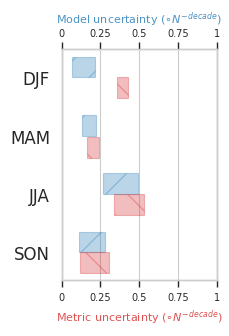

In [33]:
sns.set_context('paper')
fig, ax = plt.subplots(1, figsize=(2, 3))
## Dataset diff (blue)
ax.add_patch(mpatches.Rectangle(xy=(min(seasonal_metric_range['DJF']), 0.975), width=max(seasonal_metric_range['DJF'])-min(seasonal_metric_range['DJF']), height=(0.1), hatch='/', color='C0', alpha=.3, clip_on= True))
ax.add_patch(mpatches.Rectangle(xy=(min(seasonal_metric_range['MAM']), 0.69), width=max(seasonal_metric_range['MAM'])-min(seasonal_metric_range['MAM']), height=(0.1), hatch='/', color='C0', alpha=.3, clip_on= True))
ax.add_patch(mpatches.Rectangle(xy=(min(seasonal_metric_range['JJA']), 0.408), width=max(seasonal_metric_range['JJA'])-min(seasonal_metric_range['JJA']), height=(0.1), hatch='/', color='C0', alpha=.3, clip_on= True))
ax.add_patch(mpatches.Rectangle(xy=(min(seasonal_metric_range['SON']), 0.125), width=max(seasonal_metric_range['SON'])-min(seasonal_metric_range['SON']), height=(0.1), hatch='/', color='C0', alpha=.3, clip_on= True))

## Metric diff (red)
ax.add_patch(mpatches.Rectangle(xy=(min(seasonal_dataset_range['DJF']), 0.875), width=max(seasonal_dataset_range['DJF'])-min(seasonal_dataset_range['DJF']), height=(0.1), hatch='\\', color='C3', alpha=.3, clip_on= True))
ax.add_patch(mpatches.Rectangle(xy=(min(seasonal_dataset_range['MAM']), 0.585), width=max(seasonal_dataset_range['MAM'])-min(seasonal_dataset_range['MAM']), height=(0.1), hatch='\\', color='C3', alpha=.3, clip_on= True))
ax.add_patch(mpatches.Rectangle(xy=(min(seasonal_dataset_range['JJA']), 0.308), width=max(seasonal_dataset_range['JJA'])-min(seasonal_dataset_range['JJA']), height=(0.1),  hatch='\\', color='C3', alpha=.3, clip_on= True))
ax.add_patch(mpatches.Rectangle(xy=(min(seasonal_dataset_range['SON']), 0.025), width=max(seasonal_dataset_range['SON'])-min(seasonal_dataset_range['SON']), height=(0.1), hatch='\\', color='C3', alpha=.3, clip_on= True))

ax.set_yticks(np.linspace(0.125, 0.975, 4), labels=["SON", "JJA", "MAM", "DJF"], size=12)
ax2 = ax.twiny()
ax2.set_xlabel("Model uncertainty ${(\circ N^{-decade})}$", color='C0', size=8, alpha=.8)
ax.set_xlabel("Metric uncertainty ${(\circ N^{-decade})}$", color='C3', size=8, alpha=.8)
ax.set_xticks([0, 0.25, 0.5, 0.75, 1], [0, 0.25, 0.5, 0.75, 1],  fontsize=7)
ax2.set_xticks([0, 0.25, 0.5, 0.75, 1], [0, 0.25, 0.5, 0.75, 1],  fontsize=7)
ax2.grid(False)
ax.grid(axis='y')
ax.set_xlim(0, 1)
ax.set_ylim(-0.01, 1.11)
# fig.savefig("figures/supp_metric_vs_model.png", bbox_inches='tight')